# 最小二乗法

## 陽関数 y = f(x) の場合

## 例1. 二次多項式 $y = ax^2+bx+c$

[ 1.14285715 -1.05714291  1.80000007]


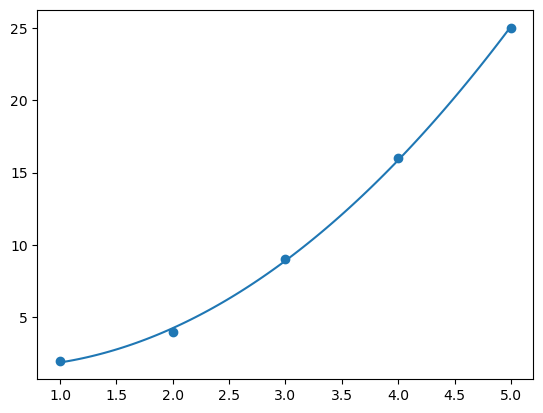

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# データ点の読み込み
data = np.loadtxt("testdata03.dat")
x = data[:,0]
y = data[:,1]

# フィッティング関数の定義
def fit_func(param, x):
    a, b, c = param
    return a*x**2+b*x+c
    
# データ点に対する残差の定義
def fit_residual(param, x, y):
    return np.abs(y - fit_func(param, x))

# フィッティングパラメータの初期推定値
param = [1,1,1]

# 最小二乗法
optimize_result = optimize.least_squares(fit_residual, param, args=(x,y))
param = optimize_result.x # 推定されたフィッティングパラメータ
print(param)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y) # データ点の描画
w=np.linspace(x.min(),x.max(),101)
ax.plot(w,fit_func(param,w)) # フィッティング曲線の描画
plt.show()

## 例2. Lorentz（Cauchy）分布+線形多項式 $y = \frac{1}{\pi}\frac{b}{(x-a)^2+b^2} + cx + d$

[-0.00627709  0.56444717  0.00766434 -0.0408929 ]


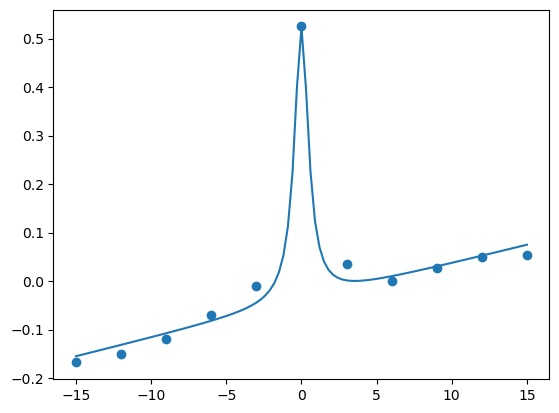

In [2]:
# データ点の読み込み
data = np.loadtxt("testdata04.dat")
x = data[:,0]
y = data[:,1]

# フィッティング関数の定義
def fit_func(param, x):
    a, b, c, d = param
    return (1/np.pi)*b/((x-a)**2+b**2) + c*x + d
    
# データ点に対する残差の定義
def fit_residual(param, x, y):
    return np.abs(y - fit_func(param, x))

# フィッティングパラメータの初期推定値
param = [1,1,1,1]

# 最小二乗法
optimize_result = optimize.least_squares(fit_residual, param, args=(x,y))
param = optimize_result.x # 推定されたフィッティングパラメータ
print(param)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y) # データ点の描画
w=np.linspace(x.min(),x.max(),101)
ax.plot(w,fit_func(param,w)) # フィッティング曲線の描画
plt.show()

## 陰関数$f(x,y)=0$の場合

## 例3. 楕円 $\left(\frac{x-x_0}{a}\right)^2 + \left(\frac{y-y_0}{b}\right)^2=1$

a=1.491944, b=0.807651, x0=0.002698, y0=0.012356


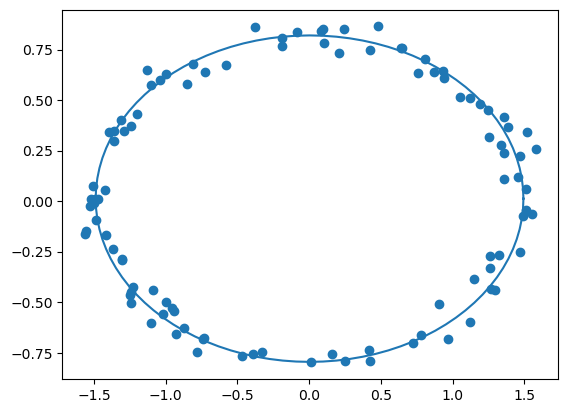

In [3]:
def create_ellipse_data_with_noise(n=100):
    a = 1.5
    b = 0.8
    theta = 2*np.pi * np.random.rand(n)
    r = 1.0 + np.random.normal(0,0.05,n)
    x = a*r*np.cos(theta)
    y = b*r*np.sin(theta)
    return x,y

# 疑似データ点の作成
x, y = create_ellipse_data_with_noise()

# データ点に対する残差の定義
def fit_residual(param, x, y):
    a, b, x0, y0 = param
    error = 1.0 - ((x-x0)/a)**2 - ((y-y0)/b)**2 
    return error

# フィッティングパラメータの初期推定値
param = [1,1,1,0.5]

# 最小二乗法
optimize_result = optimize.least_squares(fit_residual, param, args=(x,y))
param = optimize_result.x # 推定されたフィッティングパラメータ
print("a={:f}, b={:f}, x0={:f}, y0={:f}".format(*param))

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y) # データ点の描画
a, b, x0, y0 = param
t = np.linspace(0,2*np.pi,101)
ax.plot(a*np.cos(t)+x0,b*np.sin(t)+y0) # フィッティング曲線の描画
plt.show()